In [ ]:
#Predicting 100m Dash Men Tokyo 2021 Winning Time - The Lazy Way using only dates

In [2]:
#import dataset and general imports
# Metrics for Evaluation of model Accuracy and F1-score
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

df_original=pd.read_csv('100m_Results_v1.csv', sep=';', parse_dates=["Date"])


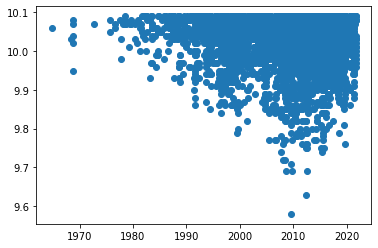

In [2]:
#Plot the data
plt.scatter(df_original["Date"], df_original["Time"])
plt.show()

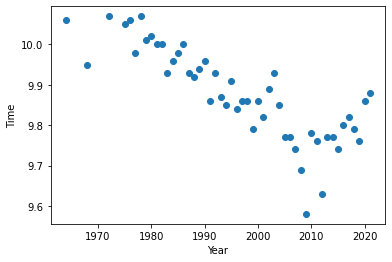

In [3]:
#From the plot we see it will not work. So picking each year`s best time (here we have the assumption that the olympic champion will hold that year`s best time; TBC)
df=df_original.drop(["Rank", "Athlete", "Country", "Birth", "Finish", "City"], axis=1)
df["Year"]=df['Date'].dt.year
df=df.drop(["Wind", "Date"], axis=1)
df=df.groupby("Year").min()
plt.scatter(df.index, df["Time"])
plt.xlabel("Year")
plt.ylabel("Time")
plt.show()

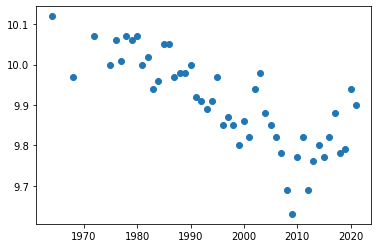

In [9]:
#Repeating with adjusted wind speed
df=df_original.drop(["Rank", "Athlete", "Country", "Birth", "Finish", "City"], axis=1)
df["Year"]=df['Date'].dt.year
df["Time"]=df["Time"]+round(df["Wind"]*0.046091+0.004864,2)
df=df.drop(["Wind", "Date"], axis=1)
df=df.groupby("Year").min()
plt.scatter(df.index, df["Time"])
plt.show()

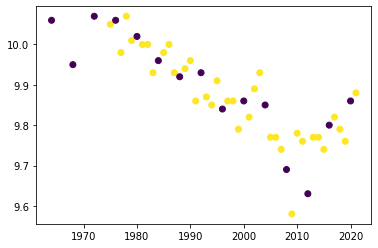

In [10]:
#Ok, wind speed got me nowhere. So let`s try and paint olympic year and search for trends
df=df_original.drop(["Rank", "Athlete", "Country", "Birth", "Finish", "City"], axis=1)
df["Year"]=df['Date'].dt.year
df=df.drop(["Wind", "Date"], axis=1)
df["OlYear"]=df["Year"]%4
df["OlYear"]=np.where(df["OlYear"]==0, 0, 1)
df=df.groupby("Year").min()
plt.scatter(df.index, df["Time"], c=df["OlYear"])
plt.show()

<ipython-input-4-c8a6a4c5b0ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bolt["Year"]=df_bolt["Date"].dt.year
<ipython-input-4-c8a6a4c5b0ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bolt["Time"]=df_bolt["Time"]+round(df_bolt["Wind"]*0.046091+0.004864,2)


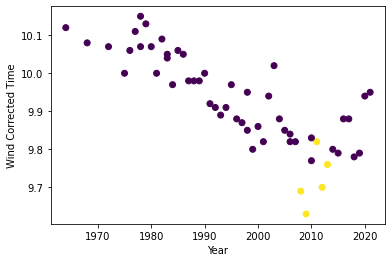

In [4]:
#New approach: Let`s see how out of this world is Usain Bolt

#Painting Bolt Years
df_bolt=df_original[df_original["BestYear"]=="VERDADEIRO"]
df_bolt["Year"]=df_bolt["Date"].dt.year
df_bolt["Time"]=df_bolt["Time"]+round(df_bolt["Wind"]*0.046091+0.004864,2)
df_bolt=df_bolt[["Year", "Time", "Bolt"]]
df_bolt["Bolt"]=np.where(df_bolt["Bolt"]=="VERDADEIRO", 1, 0)

plt.scatter(df_bolt["Year"], df_bolt["Time"], c=df_bolt["Bolt"])
plt.xlabel("Year")
plt.ylabel("Wind Corrected Time")
plt.show()

Linear cv has r2= 0.6038803813803053
Linear model has r2= 0.6382226498815067


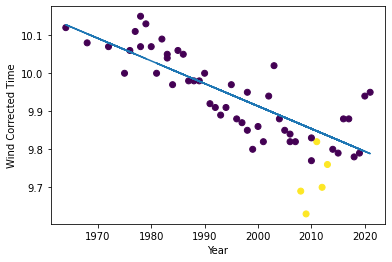

In [5]:
#Creating linear regression model without bolt years

from sklearn.linear_model import LinearRegression
from sklearn.metrics import SCORERS
from sklearn import model_selection
from sklearn.metrics import r2_score

X=pd.DataFrame(df_bolt[df_bolt["Bolt"]==0]["Year"])
y=pd.DataFrame(df_bolt[df_bolt["Bolt"]==0]["Time"])
y_r2=pd.DataFrame(df_bolt["Time"])


#training and evaluating linear regressor


linear = LinearRegression()
scoring='r2'
cv = model_selection.KFold(n_splits=5, shuffle=True, random_state=8)
r2_linear=model_selection.cross_val_score(linear, X, y, cv=cv, scoring=scoring)

print("Linear cv has r2=", r2_linear.mean())

linear.fit(X, y)
y_predict=linear.predict(pd.DataFrame(df_bolt["Year"]))

linear_score=r2_score(y_r2, y_predict)

print("Linear model has r2=", linear_score)

plt.scatter(df_bolt["Year"], df_bolt["Time"], c=df_bolt["Bolt"])
plt.plot(df_bolt["Year"], y_predict)
plt.xlabel("Year")
plt.ylabel("Wind Corrected Time")
plt.show()


In [6]:
#So, when would we expect to see someone break Bolt`s 100m record?

intercept=linear.intercept_[0]
coef=linear.coef_[0][0]
Bolt_nowind=9.58
Bolt_maxwind=9.68
Bolt_wind=9.63

X_nowind=round((Bolt_nowind-intercept)/coef,0)
X_maxwind=round((Bolt_maxwind-intercept)/coef,0)
X_boltwind=round((Bolt_wind-intercept)/coef,0)

print("Bolt record can be broken in", X_maxwind,"with a 2m/s wind or in", X_nowind, "without wind help or in", X_boltwind, "with the same wind as Bolt had")


Bolt record can be broken in 2039.0 with a 2m/s wind or in 2056.0 without wind help or in 2048.0 with the same wind as Bolt had


Linear cv has r2= 0.0722646000027613
Linear model has r2= 0.37379038717981294


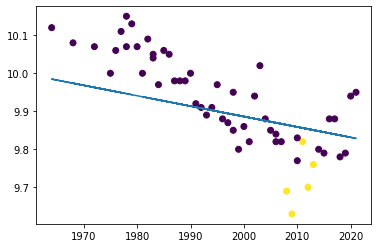

In [49]:
#Repeating from 90s onward (spoiler alert: it sucked!)

X=pd.DataFrame(df_bolt[(df_bolt["Bolt"]==0) & (df_bolt["Year"]>1989)]["Year"])
y=pd.DataFrame(df_bolt[(df_bolt["Bolt"]==0) & (df_bolt["Year"]>1989)]["Time"])
y_r2=pd.DataFrame(df_bolt["Time"])


#training and evaluating linear regressor


linear = LinearRegression()
scoring='r2'
cv = model_selection.KFold(n_splits=2, shuffle=True, random_state=8)
r2_linear=model_selection.cross_val_score(linear, X, y, cv=cv, scoring=scoring)

print("Linear cv has r2=", r2_linear.mean())

linear.fit(X, y)
y_predict=linear.predict(pd.DataFrame(df_bolt["Year"]))

linear_score=r2_score(y_r2, y_predict)

print("Linear model has r2=", linear_score)

plt.scatter(df_bolt["Year"], df_bolt["Time"], c=df_bolt["Bolt"])
plt.plot(df_bolt["Year"], y_predict)
plt.show()
